<h1>Task #2 - To Explore Supervised Machine Learning</h1>

**Objective**: We want to find out the score that a student can achieve based on the given number of hours that a student prepares for the test.

In this regression task, we will predict the percentage of marks that a student will score based upon the number of hours they studied.

This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing all the necessary libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading data directly from the remote link
link = "http://bit.ly/w-data"
data = pd.read_csv(link)

print("Data Imported Successfully!")

Data Imported Successfully!


<h2>Explore Data</h2>

In [3]:
# To check the shape of our dataset
data.shape

(25, 2)

The dataset has 25 rows & 2 columns.

In [4]:
# To check the structure of data inside our dataset
# Let's print first 10 entries of our dataset
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
# To check if any missing values are present in our dataset
data.isnull().values.any()

False

Here "False" means that there are no missing or empty values in our dataset.

In [6]:
# To see the statistical details of the dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


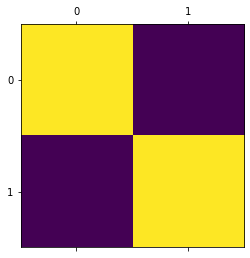

In [7]:
# To measure linear relationship between Hours & Scores
print(data.corr())

# Visualize correlation
plt.matshow(data.corr())
plt.show()

Here we see a Positive Correlation of 0.97 between hours and scores, as the number of study hours increases the student scores also increases.

<h2>Visualization of Dataset</h2>

Here we will plot our data points on a 2D-Graph to analyse our dataset and manually find a relationship between the data.

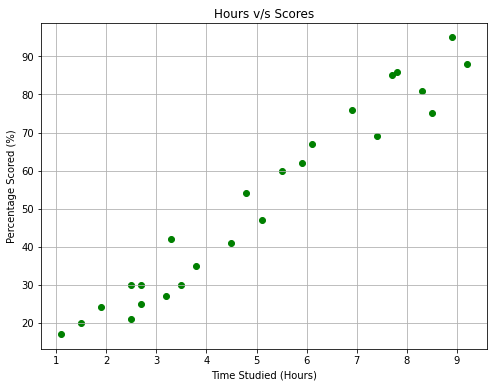

In [8]:
# To visually understand our dataset
# Plotting the distribution of scores
plt.figure(figsize=(8, 6))
plt.scatter(data['Hours'], data['Scores'], c='green')
plt.title("Hours v/s Scores")
plt.xlabel("Time Studied (Hours)")
plt.ylabel("Percentage Scored (%)")
plt.grid()
plt.show()

From the graph above, we can intuitively tell that there is a positive linear relation between the two factors. If one studies more, that student will get better scores and vice-versa. But we can see the natural variance, too. For instance, 3 students who studied for 2.4, 2.6 & 3.5 hours got exactly same score: 30%.

<h2>Preparing the Data</h2>

Now we will divide our data into "feature values" and "target values". Since we have only two columns in our dataset and we want to predict the percentage scored depending upon the hours studied, our feature set will consist of "Hours" column which is X variable and the target will be the "Scores" column which is y variable.

In [9]:
X = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [10]:
# Importing libraries to implement regression functions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import metrics

In [11]:
# Split data into train(80%) and test(20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

<h2>Model Training</h2>

In [12]:
# Let's train our model
model = LinearRegression()
model.fit(X_train, y_train)
print("Model Successfully Trained")

Model Successfully Trained


Linear regression model finds the best value for the intercept and slope, which results in a line that best fits the data. The value of the intercept and slop is calculated by the linear regression algorithm for our dataset.

In [13]:
# Let's check the best value of intercept and slope
print("The value of intercept is: ", model.intercept_)
print("The value of slope is: ", model.coef_)

The value of intercept is:  2.018160041434662
The value of slope is:  [9.91065648]


Here we can say that if a student studies one hour more than they previously studied for an exam, they can expect to achieve an increase of 9.91% in the score achieved by the student previously.

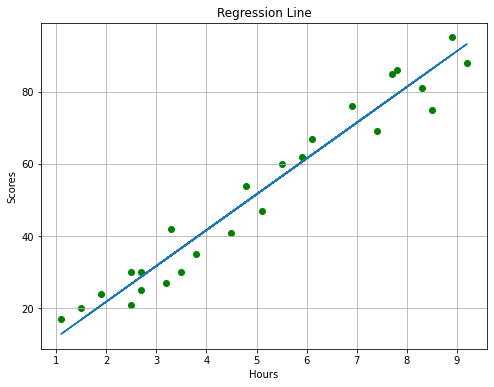

In [14]:
# Plotting the regression line
line = model.coef_*X + model.intercept_

# Plotting the data
plt.figure(figsize=(8, 6))
plt.scatter(X, y, c = "Green")
plt.plot(X, line)
plt.title("Regression Line")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.grid()
plt.show()

<h2>Making Predictions</h2>

In [15]:
# Let's make some predictions with the help of our trained model
# y_pred contains all the predicted values for the input values in the X_test series
y_pred = model.predict(X_test)

# Comparing actual values with the predicted values for the input values in the X_test
df = pd.DataFrame(np.c_[X_test,y_test,y_pred],columns=['Hours','Actual Scores','Predicted Scores'])
df

,Hours,Actual Scores,Predicted Scores
0,1.5,20.0,16.884145
1,3.2,27.0,33.732261
2,7.4,69.0,75.357018
3,2.5,30.0,26.794801
4,5.9,62.0,60.491033


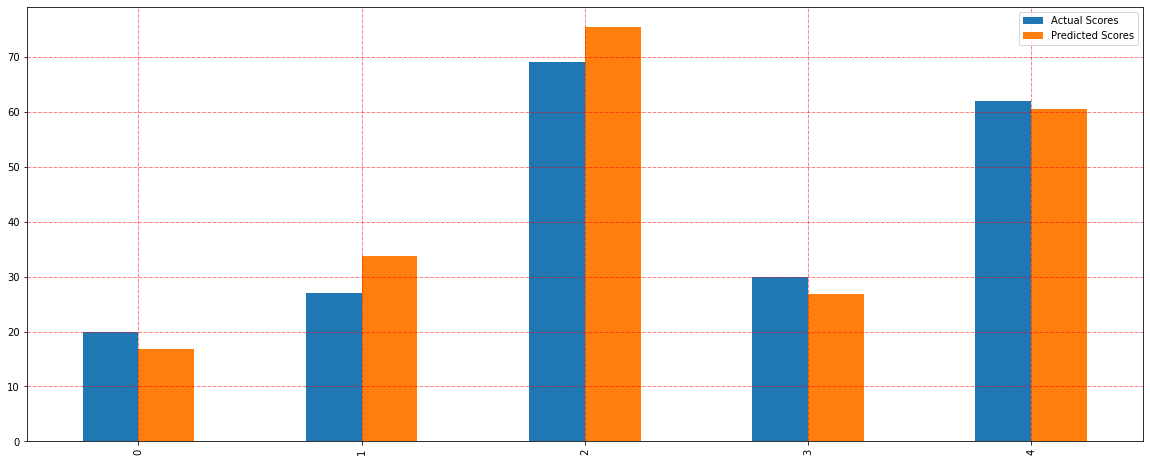

In [16]:
df.plot(y = ["Actual Scores", "Predicted Scores"], kind='bar',figsize=(20,8))
plt.grid(which = 'both', color='red', linestyle='-.', linewidth=0.5)
plt.show()

On the basis of the above graph we can make any understand that our model is not very precise, the predicted percentages are close to the actual ones but not same.

In [17]:
# Let's test with our own data
hours = input("Enter the no. of hours studied: ")
hours = float(hours)
pred = model.predict([[hours]])
print("Predicted Score is: ", pred[0])

Enter the no. of hours studied: 9.25
Predicted Score is:  93.69173248737539


<h2>Evaluating the Model</h2>

In [18]:
# Let's evaluate the performance of our algorithm
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373


We can see that the value of root mean squared error is 4.64, which is less than 10% of the mean value of the percentages of all the students i.e. 51.48. This means that our algorithm did a decent job.

In [19]:
import statsmodels.api as sm
X = data['Hours']
y = data['Scores']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Sun, 20 Sep 2020   Prob (F-statistic):           9.13e-17
Time:                        18:53:30   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.3

Looking at the R-squared value, which is 0.953 about 95% of the variability of scores is explained by the number of hours spent studying. We can say that our model can somewhat accurately predict the scores.